# Lista 2 de Exercícios - Otimização Inteira

## Preâmbulo

In [217]:
%load_ext autoreload
%autoreload 2
%pip install numpy
%pip install scipy
%pip install jupyter_anywidget_graphviz

from IPython.display import HTML, display, SVG
from jupyter_anywidget_graphviz import graphviz_headless
%load_ext jupyter_anywidget_graphviz

g = graphviz_headless()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The jupyter_anywidget_graphviz extension is already loaded. To reload it, use:
  %reload_ext jupyter_anywidget_graphviz


graphvizWidget(headless=True, response={'status': 'initialising'})

## Exemplo Sala

In [218]:
from branch_and_bound import branch_and_bound, generate_dot
import numpy as np

A = np.array([
    [1, 4, -1, 0],
    [3, 2, 0, -1]
])

b = np.array([
    5,
    7
])

c = np.array([-4, -5, 0, 0]) # we're maximizing

integrality = np.array([1, 1, 0, 0])  # x1 and x2 are integers

z_star, x_star, bnb_tree, iters = branch_and_bound(c, A, b, integrality = integrality)
dot_code = generate_dot(bnb_tree)
g.render(dot_code)

iters

[0]
[1, 2]
[2]
[5, 6]
[6]


2

### Árvore B&B

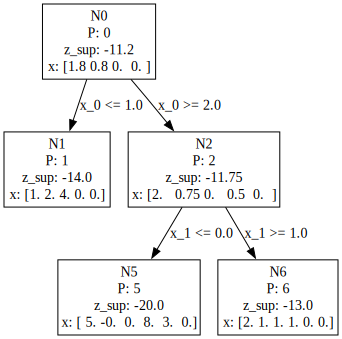

In [219]:
SVG(g.svg)

## Exemplo Livro

\begin{align}
    & z = \text{max} \ 5x_1 - x_2 \\
    & \text{subject to:} \\
    & 7 x_1 - 5x_2 \leq 13 \\
    & 3 x_1 + 2x_2 \leq 17 \\
    & x_1, x_2 \in \mathbb{Z}^{+}
\end{align}

In [220]:
A = np.array([
    [7, -5, 1, 0],
    [3,  2, 0, 1]
])

b = np.array([
    13,
    17
])

c = np.array([5, -1, 0, 0]) # we're maximizing

integrality = np.array([1, 1, 0, 0])  # x1 and x2 are integers

z_star, x_star, bnb_tree, iters = branch_and_bound(c, A, b, integrality = integrality, branching_strategy = 'fni')
dot_code = generate_dot(bnb_tree)
g.render(dot_code)
iters

[0]
[1, 2]
[2, 3, 4]
[3, 4]
[4, 7, 8]


3

### Árvore B&B

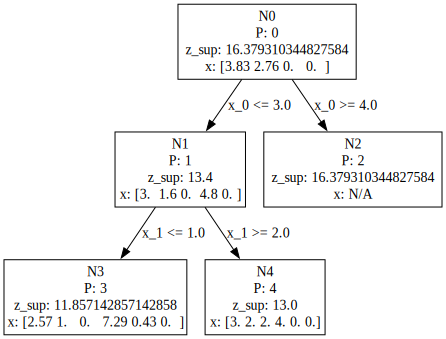

In [221]:
SVG(g.svg)

In [208]:
x_star

array([3., 2., 2., 4., 0., 0.])

In [209]:
z_star

13.0